# Data Management

### Topics

* splitting into train, dev, and test data
* cross-validation
* evaluations
* scikit-learn? NumPy? Scipy? 
* **Pandas dataframes**
    * The API: http://pandas.pydata.org/pandas-docs/stable/index.html
    * A nice tutorial: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.GxzCRGk
    * reading data
    * adding columns based on other columns
    * shifting data
    * fillna
    * pickles

### Introduction

The word **data** is actually plural (e.g., "there were lots of data"), the singular form is **datum**, but I will forgive you if you use data as a singular (which seems like a shortened way of saying "data set"). 

Not all data is neatly packaged in NLTK. In fact, a lot of the data you will be using might be formatted in some known way (if you're lucky):

* XML
* JSON
* flat text files
* databasese (e.g., sqlite, Hypersonic)
* database dumps (e.g., MySQL)

A lot of data out there doesn't have any kind of structure (that's another reason why we need NLP: to add structure where structure doesn't exist). Example: patient records inputted by doctors often contain structured information, but they are generally free to add notes which are unstructured, but full of useful information. 

Some other places where you can get (linguistic) data:

* LDC Consortium: https://www.ldc.upenn.edu/
* European Language Data: http://www.elda.org/en/
* Maluuba NLU Frames dataset: https://datasets.maluuba.com/
* Pentoref situated communication data (ask me)
* Europarl parallel corpora for machine translation: http://www.statmt.org/europarl/
* Image Captioning Data: https://github.com/dsg-bielefeld/image_wac/blob/master/Data/README.md
* ... (see Data / Corpora Trello card: https://trello.com/c/eOvqGy5F)

There are a gazillion other places to get the data you *might* need. 

Question:

* What if I need some data and there isn't any data out there to meet my needs?

Answer:

* Welcome to one of science's biggest problems. Collecting data is part of the process of becoming a good NLP engineer or scientist. 


But for now, let's look at some data that already exist. 

# 1. Predicting proper name types

* we are going to load some data in formatted CSV files
* we are going to try to predict the proper name given the words in the name using a Naive Bayes Classifier

In [2]:
import pandas as pd

data = pd.read_csv('pnp-train.txt',names=['type','name'], delimiter='\t', encoding='ISO-8859-1')

In [3]:
data[:10]

,type,name
0,drug,Dilotab
1,movie,Beastie Boys: Live in Glasgow
2,person,Michelle Ford-Eriksson
3,place,Ramsbury
4,place,Market Bosworth
5,drug,Cyanide Antidote Package
6,person,Bill Johnson
7,place,Ettalong
8,movie,The Suicide Club
9,place,Pézenas


In [4]:
data.describe()

,type,name
count,21001,21001
unique,5,20992
top,movie,Mexico
freq,6262,2


### Creating new columns based on other columns

In [5]:
def strip_lower_split(x):
    return x.strip().lower().split()

data['split_names'] = data['name'].map(strip_lower_split)

#this line below is the same as the function def and application above in this cell
#data['split_names2'] = data['name'].map(lambda x: x.strip().lower().split())

In [6]:
data[:10]

,type,name,split_names
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boys:, live, in, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
5,drug,Cyanide Antidote Package,"[cyanide, antidote, package]"
6,person,Bill Johnson,"[bill, johnson]"
7,place,Ettalong,[ettalong]
8,movie,The Suicide Club,"[the, suicide, club]"
9,place,Pézenas,[pézenas]


In [7]:
set(data.type)

{'company', 'drug', 'movie', 'person', 'place'}

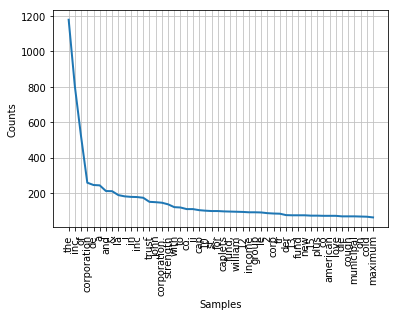

In [15]:
%matplotlib inline

import nltk

'''
words = []
for row in data.split_names:
    for word in row:
        words.append(word)

words = []
for row in data.split_names:
    words += row
'''
# this in-line double-nested super-duper for loop is the same was the for loop above        
words = [i for x in data.split_names for i in x]

nltk.FreqDist(words).plot(50)

In [16]:
data.split_names[:10] # we can access existing columns directly

0                              [dilotab]
1    [beastie, boys:, live, in, glasgow]
2              [michelle, ford-eriksson]
3                             [ramsbury]
4                     [market, bosworth]
5           [cyanide, antidote, package]
6                        [bill, johnson]
7                             [ettalong]
8                   [the, suicide, club]
9                              [pézenas]
Name: split_names, dtype: object

In [18]:
data['new_col'] = range(1,len(data)+1) # a new column can be set to any kind of list

In [20]:
data[:10]

,type,name,split_names,new_col
0,drug,Dilotab,[dilotab],1
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boys:, live, in, glasgow]",2
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]",3
3,place,Ramsbury,[ramsbury],4
4,place,Market Bosworth,"[market, bosworth]",5
5,drug,Cyanide Antidote Package,"[cyanide, antidote, package]",6
6,person,Bill Johnson,"[bill, johnson]",7
7,place,Ettalong,[ettalong],8
8,movie,The Suicide Club,"[the, suicide, club]",9
9,place,Pézenas,[pézenas],10


In [21]:
data.index = data.new_col

In [22]:
data[:10]

,type,name,split_names,new_col
new_col,,,,
1,drug,Dilotab,[dilotab],1
2,movie,Beastie Boys: Live in Glasgow,"[beastie, boys:, live, in, glasgow]",2
3,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]",3
4,place,Ramsbury,[ramsbury],4
5,place,Market Bosworth,"[market, bosworth]",5
6,drug,Cyanide Antidote Package,"[cyanide, antidote, package]",6
7,person,Bill Johnson,"[bill, johnson]",7
8,place,Ettalong,[ettalong],8
9,movie,The Suicide Club,"[the, suicide, club]",9


### Can we predict the type given the name?

In [34]:
import nltk
from nltk.classify.naivebayes import NaiveBayesClassifier
import collections as c

In [24]:
# train
data['feats'] = data['split_names'].map(lambda x: c.Counter(x))
train_data = list(zip(data['feats'], data['type']))
classifier = NaiveBayesClassifier.train(train_data)

In [25]:
# evaluate
nltk.classify.util.accuracy(classifier, train_data)

0.9761439931431837

Wow! over 97% accuracy!!! We should start a company the offers automagic proper name type detection, Right?  RIGHTT?!?

No. Because:

## It is a cardinal sin in machine learning to eavaluate on your training data!!!!!!1

Question:

* Why is it so wrong?

Answer:

* Bias
* Generalizability

Fortunately for us, this particular corpus of data has a separate file that has a randomly chosen set for evaluation/testing. Let's use that instead. 

In [26]:
test = pd.read_csv('pnp-test.txt',names=['type','name'], delimiter='\t', encoding='ISO-8859-1')
test['split_names'] = test['name'].map(lambda x: x.strip().lower().split())

In [29]:
#test
test['feats'] = test['split_names'].map(lambda x: c.Counter(x))
test_data = list(zip(test['feats'], test['type']))
nltk.classify.util.accuracy(classifier, test_data)

0.6693333333333333

About 67% for this task, using this particular classifier seems a lot more reasonable. 


**Lesson:** if you are doing some ML/NLP and you are getting amazing results, check to make sure you aren't evaluating on your training data. 

# 2. Splitting Data: train/dev/test

It's conventional to split the data into three parts:

* training data (train)
* development data (dev)
* evaluation data (eval/test; aka 'held-out' set)

How much data is split into each category depends on the corpus and the task. It's often conventional to use 80% of the data for train, 10% for dev and 10% for test. 

When developing your system, you use train to train your probability functions (i.e., models) and you can use your dev set to evaluate/test your system. You can do all kinds of analysis on your train and dev data. Once you feel your model is ready, you can evaluate on your test data. 

That leads us to another rule: don't use your test data until the final evaluation. That way you have an un-biased evaluation of your model. 

Note: Many people simply split the data into three parts and release it to the public that way. That allows others to test their own models against others' models to see which model performs the best, given the data and the task. One must keep in mind that any kind of manipulation of the test data (e.g., stemming or adding POS tags) would need to be done for the dev and test data as well. 

The next section shows an example of the train/eval split. 

# 3. Analyzing Sentiment

 * some data: http://help.sentiment140.com/for-students

**Columns:**

    0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    1 - the id of the tweet (2087)
    2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    3 - the query (lyx). If there is no query, then this value is NO_QUERY.
    4 - the user that tweeted (robotickilldozr)
    5 - the text of the tweet (Lyx is cool)

In [59]:
cols = ['polarity','id', 'date', 'query', 'user', 'tweet']

data = pd.read_csv('sentiment.train.csv',names=cols, encoding='ISO-8859-1')
print('length of data {}'.format(len(data)))
test = pd.read_csv('sentiment.test.csv',names=cols, encoding='ISO-8859-1')
print('length of test {}'.format(len(test)))
data = pd.concat([data,test])
print('length of both {}'.format(len(data)))

length of data 1600000
length of test 498
length of both 1600498


This is a lot of data. That's great! However, it will take a long time to get through this notebook with all of that data, so I'm going to randomly choose about 10% of it. We also don't need all of those columns, so let's only keep the ones we need.

In [60]:
data=data.sample(frac=0.01,random_state=200)

In [61]:
data = data.drop(['id', 'date', 'query', 'user'], axis=1)

In [62]:
data[:10]

,polarity,tweet
888312,4,Breaky burrito at Whole Foods is a good way to...
516573,0,i'm out! gonna check my facebook. please!!!!!!...
970735,4,yay just won mac msf in petticoat on ebay and ...
862961,4,@shezDOPEx3 i love you more
122643,0,@mahdi Maybe the problem is from my ISP
335291,0,Our hotel is fucking awesome Time to drink vod...
752433,0,@Keagon45 i'm soooooo jealous that you're all ...
1109199,4,Drinking chai tea and checking my blog updates
978585,4,@tmlam_140776 less than that...less than 30m
1582994,4,@lesbianscoop *lol* what did you do? need to m...


In [63]:
data.polarity.describe() # kind of useless

count    16005.000000
mean         1.998500
std          1.999999
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max          4.000000
Name: polarity, dtype: float64

In [64]:
import nltk

nltk.FreqDist(data.polarity) # the counts of 0 and 4 should be roughly equal. Why?

FreqDist({0: 8008, 4: 7996, 2: 1})

### Let's remove the neutral tweets (2) 

In [65]:
data = data[data['polarity'] != 2] # filter an entire dataframe based on a criteria

In [66]:
nltk.FreqDist(data.polarity) 

FreqDist({0: 8008, 4: 7996})

Now, I want to represent 0 as 'neg' and 4 as 'pos'

In [67]:
data['polarity'] = data.polarity.map(lambda x: 'neg' if x == 0 else 'pos')

data[:5]

,polarity,tweet
888312,pos,Breaky burrito at Whole Foods is a good way to...
516573,neg,i'm out! gonna check my facebook. please!!!!!!...
970735,pos,yay just won mac msf in petticoat on ebay and ...
862961,pos,@shezDOPEx3 i love you more
122643,neg,@mahdi Maybe the problem is from my ISP


#### Now, let's split the data into train, dev, and eval sets.

First, let's break off 20% of the data and put that into a new dataframe

In [68]:
temp=data.sample(frac=0.2,random_state=200)

temp[:10] # note that the temp dataframe retains the old index values

,polarity,tweet
469413,neg,"watching the hills..gonna go for a run after, ..."
840219,pos,@craigsbeardwax It goes from curly to straight...
857686,pos,@zackalltimelow happy birthday zaaaaaack i wi...
1159321,pos,"@MarkDennehy Cool! Well if you're around, give..."
1478364,pos,@DitaVonTeese thank you
673648,neg,i want to swim in the pool but i had my laundr...
910703,pos,@mileycyrus when u get a chance can u post a v...
916076,pos,Early morning walkies really aren't my thing.....
82384,neg,@ryanmwilson im just not feeling that great j...
952693,pos,got my money and now playing some plants v zom...


We can remove those index values from the original data frame:

In [69]:
train=data.drop(temp.index)

Now we can split the temp data into two parts: dev and test/eval:

In [70]:
dev=temp.sample(frac=0.5,random_state=200)
test=temp.drop(dev.index)

In [71]:
len(train), len(dev), len(test), len(dev) / len(data) # dev and test should be about the same, each at 10% of total

(12803, 1600, 1601, 0.09997500624843789)

#### Can we predict the sentiment just using the words of the tweet?

In [94]:
'''
    Given a dataframe with a 'tweet' and 'polarity' column, this will prepare the features for the classifier
'''

def prep_data(df):
    df['split_tweet'] = df.tweet.map(lambda x: x.strip().lower().split())
    #df['split_tweet'] = df.split_tweet.map(lambda x: [i for i in x if i not in stops])
    #df['split_tweet'] = df.split_tweet.map(lambda x: [wnl.stem(i) for i in x])
    df['feats'] = df['split_tweet'].map(lambda x: c.Counter(x))
    return list(zip(df['feats'], df['polarity']))


In [95]:
train_data = prep_data(train)
classifier = NaiveBayesClassifier.train(train_data)

In [96]:
dev_data = prep_data(dev)
nltk.classify.util.accuracy(classifier, dev_data)

0.711875

Question:

* This is good, right?

Answer:

* It all depends on your **baseline**. Since the neg/pos frequency is about 50/50, then we know our classifier is doing well when we are above that baseline. This is called the *most common* baseline (i.e., what is the accuracy of a random classifier that simple chooses the most common class label/type?) Right now we are about 26% above that baseline, so not bad. 
* Another kind of baseline is the *random* baseline which is basically 1/len(types) which in this case is 2. So the random baseline here is the same as the most common baseline beacuse it's a binary problem. If we had 4 possible types, then the random baseline would be 25%, but the most common baseline would be the relative frequency of the most common type in the training data. 

A better baseline is actually what we have above, which is our > 73% accuracy score. This is called a "bag of words" baseline. It uses the simplest features: words. Let's work from here to make our classifier work better. 




### Feature Engineering

What is a **feature**? A feature is an individual measurable property of a phenomenon being observed. Choosing informative, discriminating and independent features is a crucial step for effective algorithms in pattern recognition, classification and regression. 

In other words, a **feature** corresponds to a value of a variable in the probability functions. A **feature type** corresponds to the variables themselves. 

For example, we wrote a function for `P(W)`. Where `W` is the feature type of word, and an individual feature is the value `the` that `W` can take. 

What are the features we've been using so far to get our > 73% above? We've been using the words as features.

We can use words, but what else?

Would stemming not help here, for example?

In [91]:
import nltk
import nltk.stem.snowball as stem

wnl = stem.EnglishStemmer()

train[:5]

,polarity,tweet,split_tweet,feats
888312,pos,Breaky burrito at Whole Foods is a good way to...,"[breaky, burrito, at, whole, foods, is, a, goo...","{'breaky': 1, 'burrito': 1, 'at': 1, 'whole': ..."
516573,neg,i'm out! gonna check my facebook. please!!!!!!...,"[i'm, out!, gonna, check, my, facebook., pleas...","{'i'm': 1, 'out!': 1, 'gonna': 1, 'check': 1, ..."
970735,pos,yay just won mac msf in petticoat on ebay and ...,"[yay, just, won, mac, msf, in, petticoat, on, ...","{'yay': 1, 'just': 1, 'won': 1, 'mac': 1, 'msf..."
862961,pos,@shezDOPEx3 i love you more,"[@shezdopex3, i, love, you, more]","{'@shezdopex3': 1, 'i': 1, 'love': 1, 'you': 1..."
122643,neg,@mahdi Maybe the problem is from my ISP,"[@mahdi, maybe, the, problem, is, from, my, isp]","{'@mahdi': 1, 'maybe': 1, 'the': 1, 'problem':..."


We can add a line like the one in the following cell to our `prep_data` function. 

Does it help to do stemming?

In [92]:
train['stem_tweet'] = train.split_tweet.map(lambda x: [wnl.stem(i) for i in x])

(185336, 172158)

What about removing stop words?

In [53]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

#df['split_tweet'] = df.split_tweet.map(lambda x: [i for i in x if i not in stops])

What about POS tagging? How should we treat the words and tags? As pairs (this yields about 63%)? As independent features?
 
warning: using this takes a long time

In [35]:
# df['split_tweet'] = df.tweet.map(lambda x: zip(nltk.pos_tag(x),x))

What about considering bigrams instead of just unigrams?

In [36]:
# copy, shift, fill



What else might help improve our scores? Could we use WordNet?

Notes from Dr. K:

  * Feature engineering is where ML and NLP come together: knowledge about how language works and how it can be analyzed and applied help us know what features might be applied. However, newer forms of ML including neural networks make it so some feature engineering is not neccesary (for better or for worse). We don't dicuss this any more in this course, but I wanted to make you aware of it. 

When we are done with feature engineering and are happy with our train/dev accuracy, then we can run our evaluation on the final test set:

In [37]:
train_data = prep_data(train)
dev_data = prep_data(dev)
classifier = NaiveBayesClassifier.train(train_data + dev_data) # note that now we can add train+dev for training

test_data = prep_data(test)
nltk.classify.util.accuracy(classifier, test_data)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.7436890777305674

# 4. Cross-validation

You might be thinking "even though we randomly determined the split between test/dev/test, there are probably some anaomolies in the data that would cause bias. Some of the things we do to improve accuracy between the test/dev sets might not work for the held-out test set. Is there a way we can split the data multiple times and develop?

Yes, this is called cross-validation. In cross-validation, we still need to break off a held-out test set for final evaluation. But the rest of the data is split between **folds** where one fold is used for dev testing and the other folds are used for training. For our above data, we could take 10% of it and save that in a held-out test set, then split the remaining data into 10 equal parts (i.e, folds). Then we can step through each part, train on the other 9 and evaluate on that one part. 

Note: if we split our data such that we train on everything except for a single data point for each fold, then we are conducing a type of cross-validation called **leave-one-out** where literally we "leave one data point out", train on the rest, then evaluate on that single data point. You can imagine that this could take a while depending on the size of the data set. 

We can use cross-validation for feature engineering, then when we are happy with the results we can evaluate on the held-oust test set. 

# 5. Evaluating and analyzing our models

So far we've only looked at accuracy to show how well a trained probability function like a Naive Bayes Classifier works with certain data. There are other ways to evaluate models that we will look at in future lectures.

We will also look at other ways to analyze our models and the results that they give in future lectures. 